In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tested.csv')

In [3]:
# Display first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
# Check the data types
print("\nData Types in the Dataset:")
print(df.dtypes)


Data Types in the Dataset:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [26]:
# Check for missing values
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())


Missing Values in the Dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [27]:
# Add a synthetic datetime column
df['date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')

# Set the "date" column as the index
df.set_index('date', inplace=True)

# Confirm the new column
print("\nDataset with Synthetic Datetime Column:")
print(df.head())


Dataset with Synthetic Datetime Column:
            PassengerId  Survived  Pclass  \
date                                        
2023-01-01          892         0       3   
2023-01-02          893         1       3   
2023-01-03          894         0       2   
2023-01-04          895         0       3   
2023-01-05          896         1       3   

                                                    Name     Sex   Age  SibSp  \
date                                                                            
2023-01-01                              Kelly, Mr. James    male  34.5      0   
2023-01-02              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2023-01-03                     Myles, Mr. Thomas Francis    male  62.0      0   
2023-01-04                              Wirz, Mr. Albert    male  27.0      0   
2023-01-05  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1   

            Parch   Ticket     Fare Cabin Embarked  
date                  

In [28]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Display numeric columns
print("\nNumeric Columns:")
print(numeric_columns)


Numeric Columns:
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [29]:
# Fill missing values in numeric columns with the column mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Confirm no missing values remain in numeric columns
print("\nMissing Values After Imputation (Numeric Columns):")
print(df[numeric_columns].isnull().sum())


Missing Values After Imputation (Numeric Columns):
PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


In [30]:
# Resample numeric data to calculate weekly averages
weekly_data = df[numeric_columns].resample('W').mean()

# Display the resampled data
print("\nWeekly Resampled Data:")
print(weekly_data.head())


Weekly Resampled Data:
            PassengerId  Survived    Pclass        Age     SibSp     Parch  \
date                                                                         
2023-01-01        892.0  0.000000  3.000000  34.500000  0.000000  0.000000   
2023-01-08        896.0  0.428571  2.714286  32.571429  0.428571  0.285714   
2023-01-15        903.0  0.428571  2.000000  35.467513  0.714286  0.000000   
2023-01-22        910.0  0.428571  2.428571  30.857143  0.428571  0.142857   
2023-01-29        917.0  0.428571  1.571429  33.538941  0.285714  0.714286   

                 Fare  
date                   
2023-01-01   7.829200  
2023-01-08  11.927386  
2023-01-15  33.530957  
2023-01-22  17.859514  
2023-01-29  67.091671  


In [31]:
# Calculate rolling mean and rolling standard deviation for the first numeric column
target_column = numeric_columns[0]
df['rolling_mean'] = df[target_column].rolling(window=7).mean()
df['rolling_std'] = df[target_column].rolling(window=7).std()

# Display rolling statistics
print("\nRolling Statistics:")
print(df[['rolling_mean', 'rolling_std']].head(10))


Rolling Statistics:
            rolling_mean  rolling_std
date                                 
2023-01-01           NaN          NaN
2023-01-02           NaN          NaN
2023-01-03           NaN          NaN
2023-01-04           NaN          NaN
2023-01-05           NaN          NaN
2023-01-06           NaN          NaN
2023-01-07         895.0     2.160247
2023-01-08         896.0     2.160247
2023-01-09         897.0     2.160247
2023-01-10         898.0     2.160247


In [32]:
# Create lagged features for the first numeric column
df['lag_1'] = df[target_column].shift(1)
df['lag_7'] = df[target_column].shift(7)

# Display lagged features
print("\nLagged Features:")
print(df[['lag_1', 'lag_7']].head(10))


Lagged Features:
            lag_1  lag_7
date                    
2023-01-01    NaN    NaN
2023-01-02  892.0    NaN
2023-01-03  893.0    NaN
2023-01-04  894.0    NaN
2023-01-05  895.0    NaN
2023-01-06  896.0    NaN
2023-01-07  897.0    NaN
2023-01-08  898.0  892.0
2023-01-09  899.0  893.0
2023-01-10  900.0  894.0


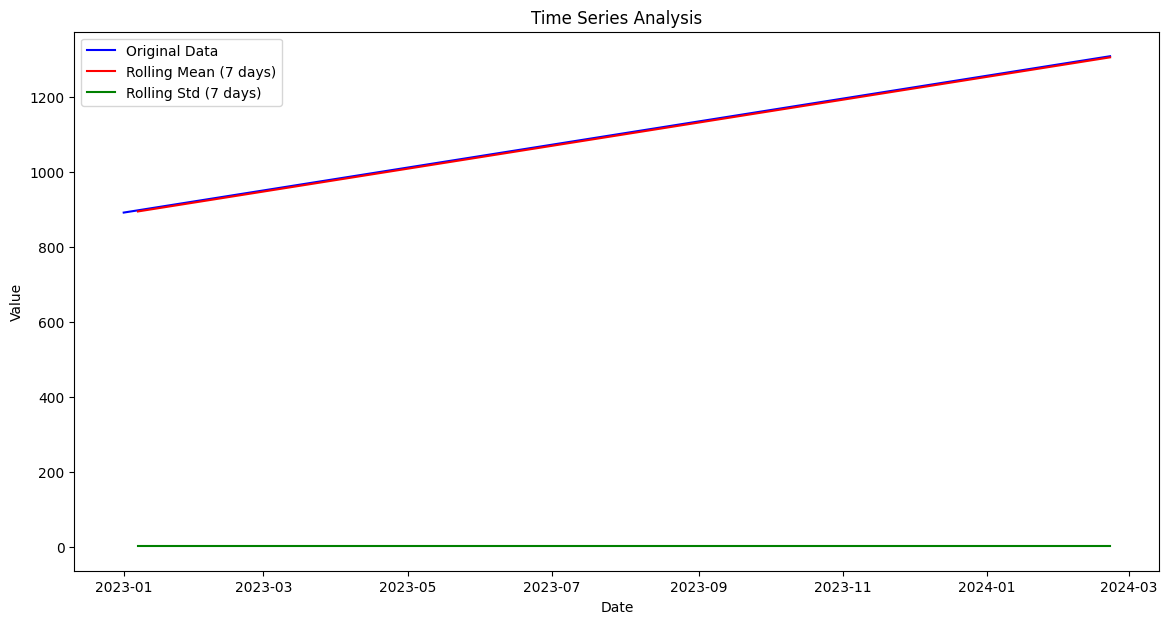

In [33]:
import matplotlib.pyplot as plt

# Plot original data, rolling mean, and rolling standard deviation
plt.figure(figsize=(14, 7))
plt.plot(df[target_column], label='Original Data', color='blue')
plt.plot(df['rolling_mean'], label='Rolling Mean (7 days)', color='red')
plt.plot(df['rolling_std'], label='Rolling Std (7 days)', color='green')
plt.legend()
plt.title('Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [36]:
# Export the final dataset to a CSV file
df.to_csv("processed_time_series.csv", index=True)
print("\nProcessed Dataset Exported as 'processed_time_series.csv'")


Processed Dataset Exported as 'processed_time_series.csv'
